# Initial relations for $M_n$

In this notebook we'll validate the analytic expressions for $M_n$ with n=0 to 3:

In [10]:
import numpy as np
from scipy.integrate import quad
from scipy.special import ellipe,ellipk
import matplotlib.pyplot as pl
%matplotlib inline
epsabs = 1e-12
epsrel = 1e-12

Here is the expression for the integral M_n:

In [7]:
def M_n(r, b, n):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        kappa_half = np.arcsin(np.sqrt(k2))
        func = lambda x: np.sqrt(k2-np.sin(x)**2)**n
        res, err = quad(func,-kappa_half,kappa_half,epsabs=epsabs,epsrel=epsrel)
        return np.sqrt(4*b*r)**n*res
    elif b <= 1 - r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        func = lambda x: np.sqrt(k2-np.sin(x)**2)**n
        res, err = quad(func,-np.pi/2,np.pi/2,epsabs=epsabs,epsrel=epsrel)
        return np.sqrt(4*b*r)**n*res
    elif b <= r - 1:
        return 0
    else:
        raise NotImplementedError("Missing case!")

Another function evaluates this integral analytically for the values n = 0 to 3:

In [8]:
def M_0_to_3(r,b,n):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        kappa_half = np.arcsin(np.sqrt(k2))
        if n == 0:
            return 2*kappa_half
        elif n == 1:
            return 2*np.sqrt(4*b*r)*(ellipe(k2)-(1-k2)*ellipk(k2))
        elif n == 2:
            return 4*b*r*((k2-0.5)*2*kappa_half+np.sqrt(k2*(1-k2)))
        elif n == 3:
            return 2/3*np.sqrt(4*b*r)**3*((4*k2-2)*ellipe(k2)+(3*k2-2)*(k2-1)*ellipk(k2))
        else:
          raise NotImplementedError("k2 < 1; n > 3")
    elif b <= 1 - r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        if n == 0:
            return np.pi
        elif n == 1:
            return 2*np.sqrt(1-(r-b)**2)*ellipe(1/k2)
        elif n == 2:
            return np.pi*(1-b*b-r*r)
        elif n == 3:
            return 2/3*np.sqrt(1-(r-b)**2)**3*(2*(2-1/k2)*ellipe(1/k2)-(1-1/k2)*ellipk(1/k2))
        else:
          raise NotImplementedError("k2 > 1; n > 3")
    elif b <= r - 1:
        return 0
    else:
        raise NotImplementedError("Missing case!")

Let's show that the expressions yield the same answer (to within the error of the numerical method) over a large range of $b$ and $r$ values:

In [13]:
n = 50
barr = np.linspace(1e-4, 2, n)
rarr = np.linspace(1e-4, 2, n)
diff = np.zeros((n, n))
Nu_grid = np.linspace(0,3,4)

# Nu is the order of the integral:
def plot(Nu):
    for i, b in enumerate(barr):
        for j, r in enumerate(rarr):
            diff[j, i] = abs(M_n(r, b, Nu) - M_0_to_3(r, b, Nu))
    fig = pl.figure(figsize=(10, 8))
    pl.imshow(diff, origin="lower", extent=(0, 2, 0, 2))
    pl.xlabel("Impact parameter", fontsize=16)
    pl.ylabel("Radius ratio", fontsize=16)
    cb = pl.colorbar()
    cb.ax.set_ylabel("Difference", fontsize=16);

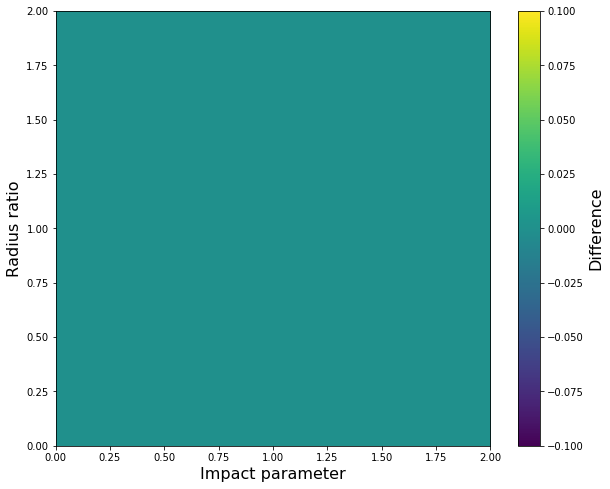

In [14]:
plot(0)

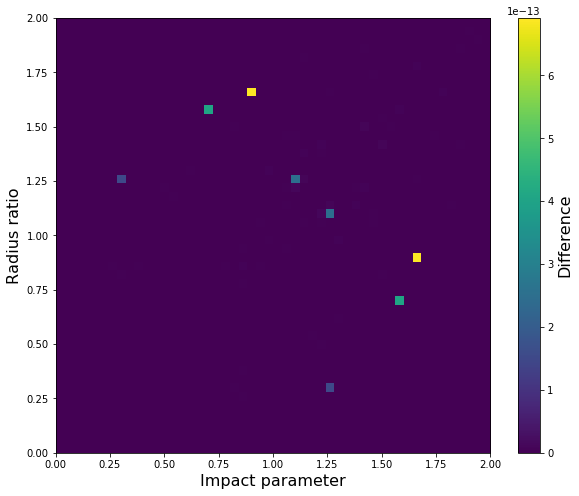

In [15]:
plot(1)

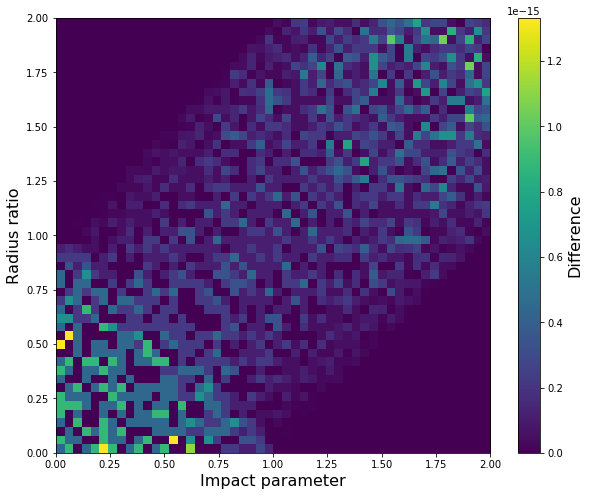

In [16]:
plot(2)

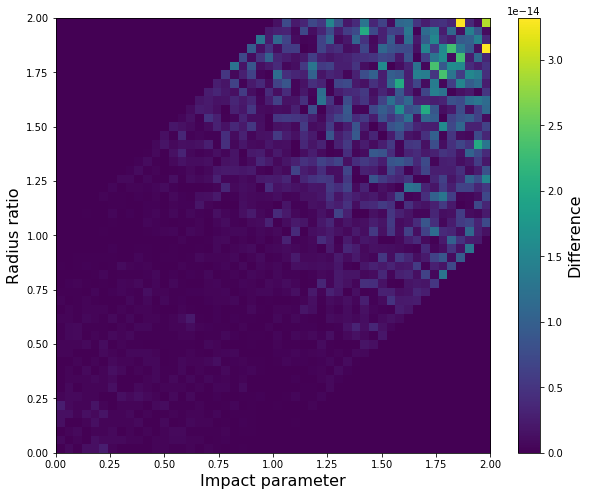

In [17]:
plot(3)

The difference is numerically precise everywhere, indicating that our expression is correct.